In [1]:
import random
import math
import numpy as np
from matplotlib import pyplot as plt
inputs = [[-14,-5],[13,13],[0,23],[-19,-11],[-9,-16],[21,27],[-49,15],[26,13],[-46,5],[-34,-1],[11,15],[-49,0],[-22,-16],[19,28],[-12,-8],[-13,-19],[-41,8],[-11,-6],[-25,-9],[-18,-3]]

In [2]:
class KMeans:
    def __init__(self,k):
        self.k = k
        self.means = None # 각 cluster의 centroid를 나타내는 값. k개의 centroid를 갖는 list
    
    def classify(self,input):
        distances = [euclidean_distance(input,centroid)for centroid in self.means]
        distances = np.array(distances)
        return np.argmin(distances)
    
    def train(self,inputs):
        self.means = random.sample(inputs,self.k) # 초기 중심점을 dataset에서 부터 임의로 지정한다. training의 의미는 이 controid값을 배정하는 것
        assignments = None
        
        while True:
            # 소속되는 군집을 다시 찾기
            new_assignments = []
            for group in map(self.classify,inputs):
                new_assignments.append(group)
            #print(new_assignments)
            # 만약 clustering의 결괏값이 변하지 않았다면,
            if assignments == new_assignments:
                return
            else:
                assignments = new_assignments
                #print('assignments :',assignments)
                # conetorid 재조정
                for group_idx in range(self.k):
                    vectors =[]
                    for data,label in zip(inputs,assignments):
                        #print('label : ',label,'\ndata:',data)
                        if label == group_idx:
                             vectors.append(data)
                    vectors = np.array(vectors)
                    new_centroid = np.sum(vectors,axis=0) / vectors.shape[0]
                    self.means[group_idx] = new_centroid

In [3]:
def euclidean_distance(vec1,vec2):
    vec1 = np.array(vec1)
    vec2 = np.array(vec2)
    distance = vec1-vec2
    distance = distance **2
    distance = sum(distance)
    return distance ** 0.5

[array([-43.8,   5.4]), array([-15.88888889, -10.33333333]), array([ 15.        ,  19.83333333])]


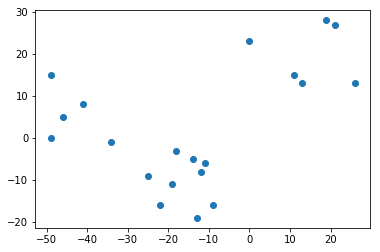

In [4]:
clusterer = KMeans(3)
clusterer.train(inputs)
print(clusterer.means)
inputs = np.array(inputs)
axis_x = inputs[:,0]
axis_y = inputs[:,1]
plt.scatter(axis_x,axis_y)
plt.show()

In [5]:
def squared_clustering_errors(inputs,k):
    clusterer = KMeans(k)
    clusterer.train(inputs)
    means = clusterer.means
    assignments = list(map(clusterer.classify,inputs)) # return cluster idx list
    return sum(euclidean_distance(data,means[idx])for data,idx in zip(inputs,assignments))

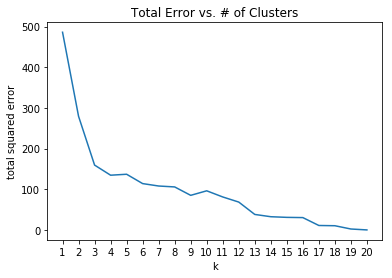

In [ ]:
inputs = list(inputs)
ks = range(1,len(inputs)+1)
errors = [squared_clustering_errors(inputs,k)for k in ks]
plt.plot(ks,errors)
plt.xticks(ks)
plt.xlabel('k')
plt.ylabel('total squared error')
plt.title('Total Error vs. # of Clusters')
plt.show()